# Convolution Feature

In [99]:
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize

# Data Import

In [170]:
base="Feature-"
sony_data=[]
for i in range(1,13):
    oneFeature=[]
    f=open("./sony/"+base+str(i)+".csv",'r')
    for line in f:
        line=line[1:-1]
        line=line.split(',')
        for each in line:
            oneFeature.append(each)
    sony_data.append(oneFeature)
    f.close()
    
canon_data=[]
for i in range(1,13):
    oneFeature=[]
    f=open("./canon/"+base+str(i)+".csv",'r')
    for line in f:
        line=line[1:-1]
        line=line.split(',')
        for each in line:
            oneFeature.append(each)
    canon_data.append(oneFeature)
    f.close()
print "Sony :",len(sony_data[1])
print "Canon: ",len(canon_data[1])

Sony : 200
Canon:  576


# converting in feature form

In [171]:
sony_f=[]
for data_no in range(len(sony_data[1])):
    single_data_set=[]
    for feature_no in range(len(sony_data)):
        single_data_set.append(sony_data[feature_no][data_no])
    sony_f.append(single_data_set)
        
canon_f=[]
for data_no in range(len(canon_data[1])):
    single_data_set=[]
    for feature_no in range(len(canon_data)):
        single_data_set.append(canon_data[feature_no][data_no])
    canon_f.append(single_data_set)
        

### Fix Error need to execute iteratively to get data Without Nan

In [181]:
#Drop dataset with NaN values
mark=[]
for dataset in range(len(sony_f)):
    for feature in range(len(sony_f[1])):
        if sony_f[dataset][feature] == "NaN":
            mark.append(dataset)
            
#delete marked
mark=set(mark)
for index in mark:
    del sony_f[index]

mark=[]
for dataset in range(len(canon_f)):
    for feature in range(len(canon_f[1])):
        if canon_f[dataset][feature] == "NaN":
            mark.append(dataset)
#delete marked
mark=set(mark)
for index in mark:
    del canon_f[index]
#del mark  
#del sony_data
#del canon_data
print "Sony :",len(sony_f)
print "Canon: ",len(canon_f)

Sony : 112
Canon:  543


In [185]:
#convert to float
for i in range(len(sony_f)):
    sony_f[i]=[float(x) for x in sony_f[i]]
for i in range(len(canon_f)):
    canon_f[i]=[float(x) for x in canon_f[i]]

#  Create Training & Test Set

In [189]:
#Train
train_x=sony_f[25:]+canon_f[75:]
#normalise
train_x=normalize(train_x, norm='l2', axis=1, copy=True)
train_y=[0]*len(sony_f[25:]) + [1]*len(canon_f[75:])
print "train_x :",len(train_x)
print "train_y :",len(train_y)

#Test
test_x=sony_f[:25]+canon_f[:75]
test_x=normalize(test_x, norm='l2', axis=1, copy=True)
test_y=[0]*25 + [1]*75
print "test_x :",len(test_x)
print "test_y :",len(test_y)

train_x : 555
train_y : 555
test_x : 100
test_y : 100


# SVM Classifier

In [190]:
# clsf = classifier
clsf=SVC(kernel='rbf',gamma=10,C=1) #SVM Classier
svm={} #store accuracy data for plotting

In [191]:
#training
clsf.fit(train_x, train_y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Testing on training Data

In [192]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clsf.predict(train_x)
svm["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',svm["trainig_set"],'%'


Accuracy Check  84.3243243243 %


# Testing on test Data

In [193]:
prediction = clsf.predict(test_x)
svm["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',svm["test_set"],'%'

Accuracy Check  75.0 %


#  Decision Tree Classifier

In [286]:
decision={}
clf=DecisionTreeClassifier(max_depth=4,min_samples_split=10)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [287]:
#train
clf = clf.fit(train_x, train_y)


#  Testing accuracy on training data

In [288]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clf.predict(train_x)
decision["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',decision["trainig_set"],'%'

Accuracy Check  93.5135135135 %


# Testing accuracy on Testing data

In [289]:
prediction = clf.predict(test_x)
decision["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',decision["test_set"],'%'

Accuracy Check  76.0 %


# Neural Net Regressor

In [297]:
from sklearn.neural_network import MLPClassifier

In [298]:
neural=dict()
clf = MLPClassifier(algorithm='l-bfgs',hidden_layer_sizes=(50,), alpha=1e-5, random_state=1)
clf

MLPClassifier(activation='relu', algorithm='l-bfgs', alpha=1e-05,
       batch_size=200, beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [299]:
#trainig Network
clf.fit(train_x, train_y)

MLPClassifier(activation='relu', algorithm='l-bfgs', alpha=1e-05,
       batch_size=200, beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

# Testing accuracy on training data

In [300]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clf.predict(train_x)
neural["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',neural["trainig_set"],'%'

Accuracy Check  86.6666666667 %


# Testing accuracy on testing data

In [303]:
prediction = clf.predict(test_x)
neural["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',neural["test_set"],'%'

Accuracy Check  79.0 %


#  Ploting

In [310]:
import pylab as plt
plt.rcParams['figure.figsize'] = 16, 12

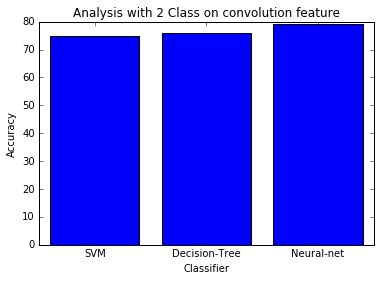

In [312]:
#%pylab inline
classifier = [1,2,3]
accuracy_test_data=[svm["test_set"],decision["test_set"],neural["test_set"]]
LABELS=["SVM","Decision-Tree","Neural-net"]

plt.bar(classifier,accuracy_test_data,align='center')
plt.xticks(classifier, LABELS) #binding label with x axis data
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Analysis with 2 Class on convolution feature')
plt.show()

In [313]:
#store Processed data in CSV
import csv


In [315]:
csvfile="sony.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerows(sony_f)

In [316]:
csvfile="canon.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerows(canon_f)

# Thanks